### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Read the Data

In [2]:
raw_data = pd.read_csv(r"C:\zubeda\INSAID\Fraud.csv")

raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Understand and Prepare the data

In [3]:
raw_data.shape

(6362620, 11)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
raw_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Checking for null values

In [6]:
raw_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Outlier Detection

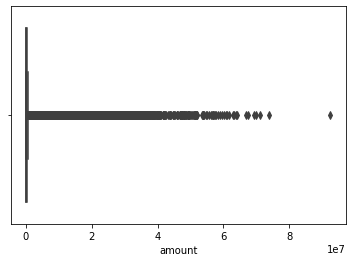

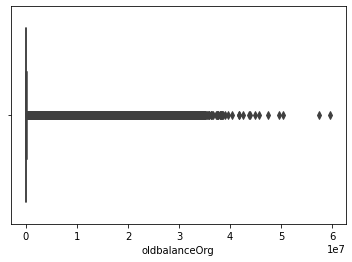

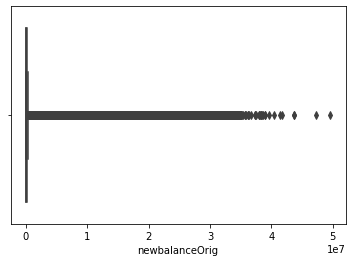

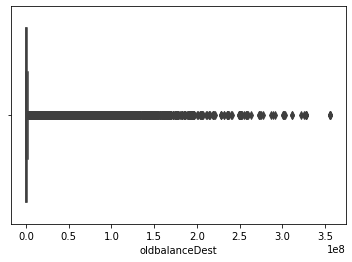

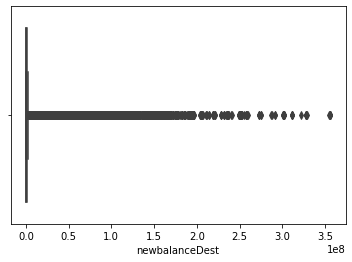

In [7]:
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

for col in num_cols:
    sns.boxplot(x=col, data=raw_data)
    plt.show()

In [8]:
credit_data = raw_data.copy(deep=True)

In [9]:
for col in num_cols: 
        x = np.array(raw_data[col])
        qr1 = np.quantile(x, 0.25)
        qr3 = np.quantile(x, 0.75)
        iqr = qr3 - qr1
        utv = qr3 + (1.5 * iqr)
        ltv = qr1 - (1.5 * iqr)
        y = []
        credit_data.loc[(credit_data[col] < ltv) | (credit_data[col] > utv), col] = credit_data[col].mean()

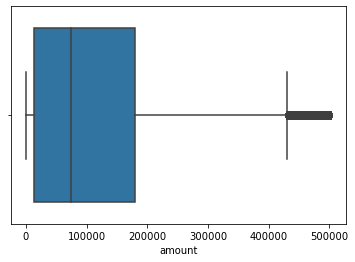

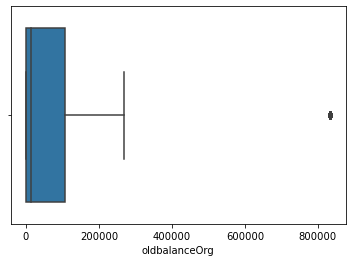

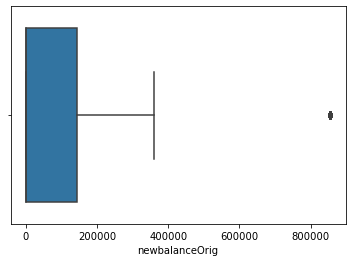

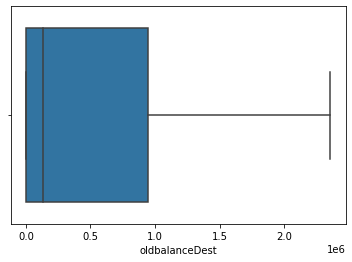

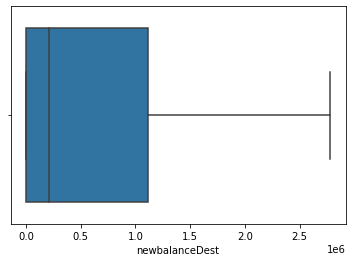

In [10]:
for col in num_cols:
    sns.boxplot(x=col, data=credit_data)
    plt.show()

Multicollinearity

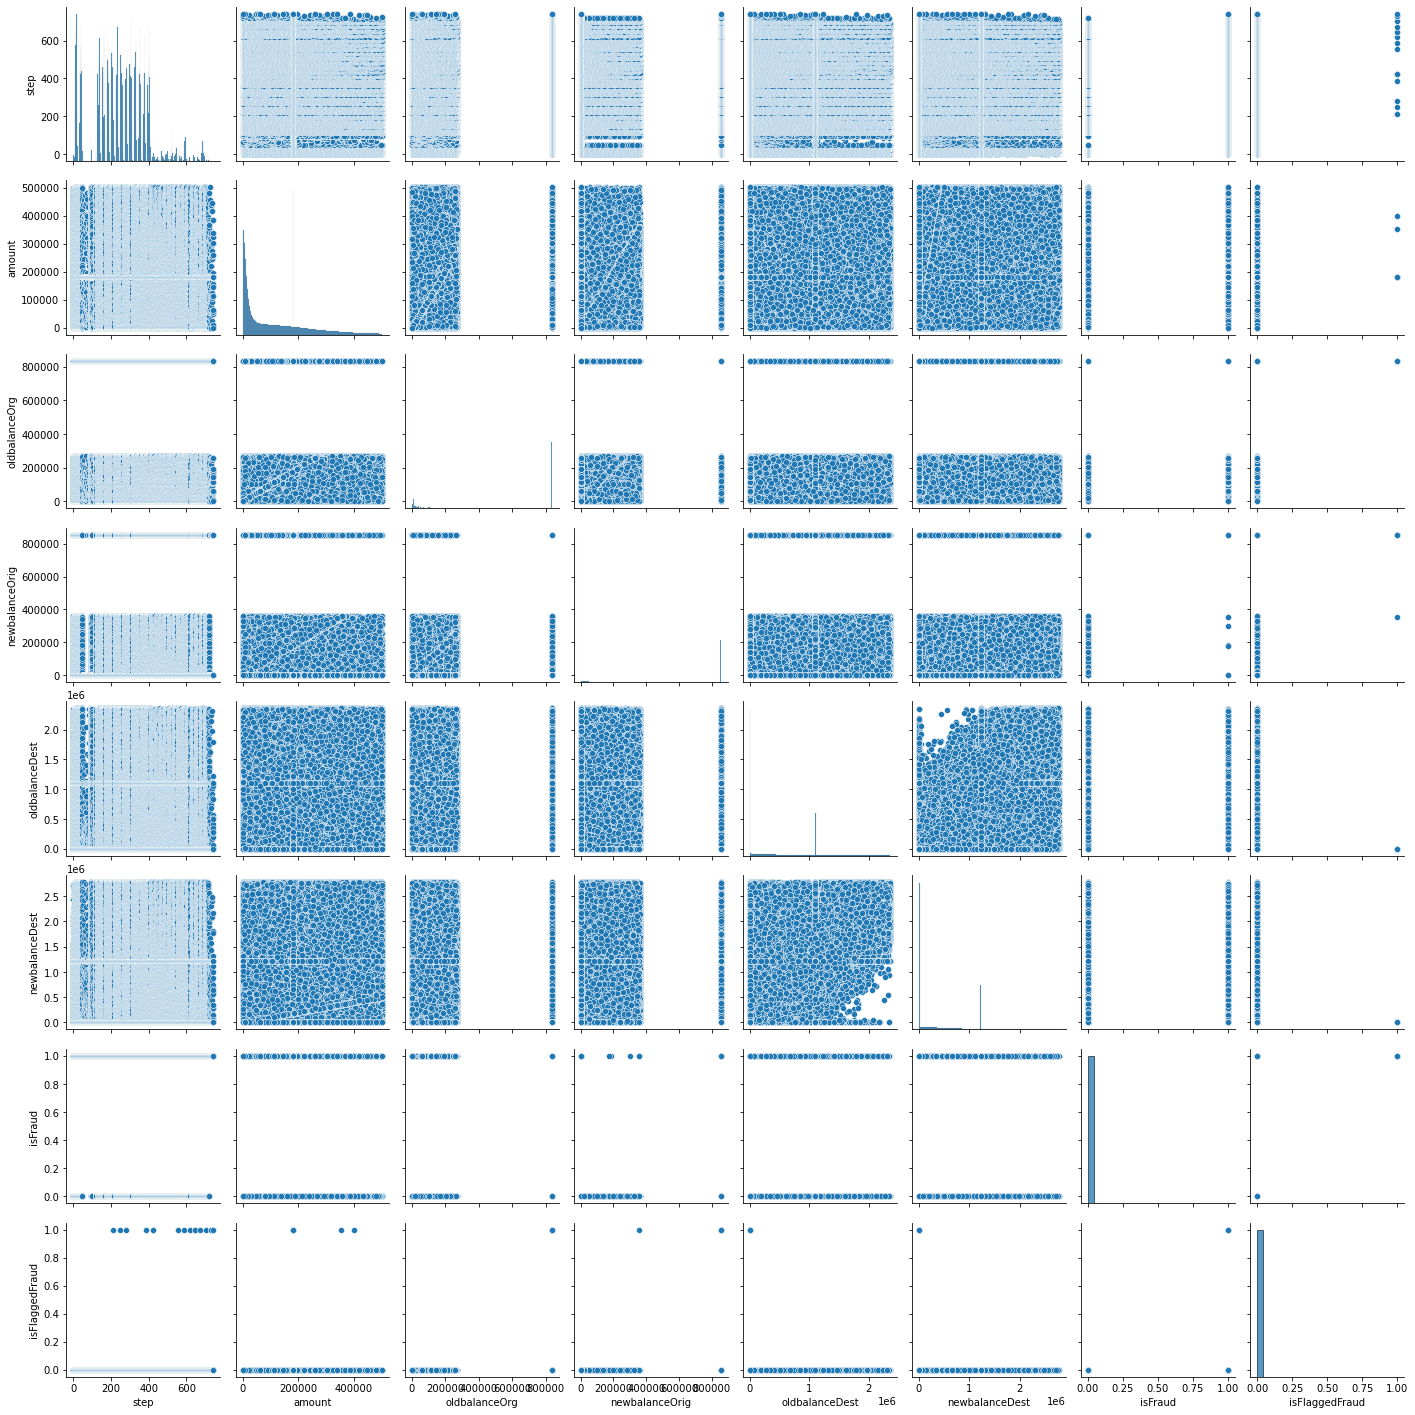

In [10]:
sns.pairplot(credit_data)
plt.show()

In [11]:
corr = credit_data.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.009802,-0.013669,-0.012677,-0.007060,-0.014774,0.031578,0.003277
amount,-0.009802,1.000000,0.086490,0.152561,0.414166,0.461708,0.018774,0.001198
oldbalanceOrg,-0.013669,0.086490,1.000000,0.891944,0.170203,0.084127,0.043531,0.003402
newbalanceOrig,-0.012677,0.152561,0.891944,1.000000,0.182941,0.065259,-0.017744,0.003314
oldbalanceDest,-0.007060,0.414166,0.170203,0.182941,1.000000,0.911081,-0.014608,-0.001237
newbalanceDest,-0.014774,0.461708,0.084127,0.065259,0.911081,1.000000,-0.003209,-0.001280
isFraud,0.031578,0.018774,0.043531,-0.017744,-0.014608,-0.003209,1.000000,0.044109
isFlaggedFraud,0.003277,0.001198,0.003402,0.003314,-0.001237,-0.001280,0.044109,1.000000


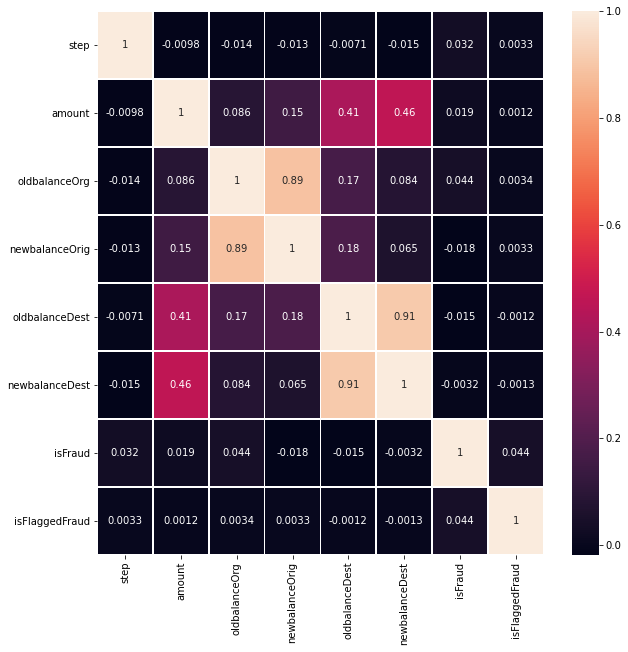

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(credit_data.corr(), annot=True, linewidth=0.5, ax=ax)
plt.show()

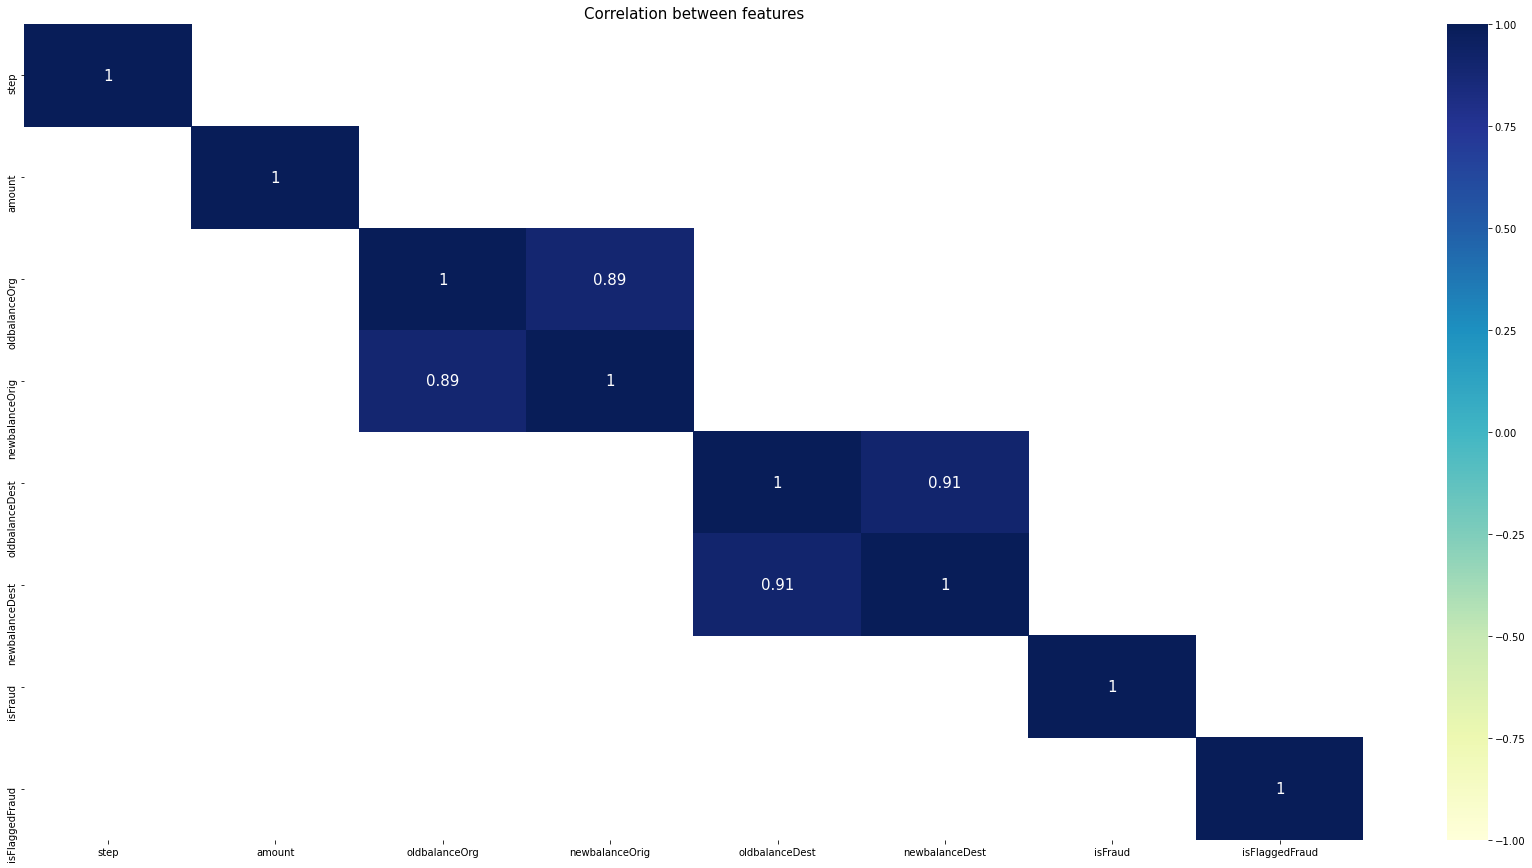

In [13]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], annot=True, annot_kws={'size': 15}, cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation between features', fontsize=15)
plt.show()

In [14]:
credit_data1 = credit_data.copy(deep=True)

Removing variables to avoid correlation between independent varibles

In [15]:
credit_data1 = credit_data1.drop(["oldbalanceOrg", "oldbalanceDest"], axis=1)
credit_data1.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0


In [16]:
corr = credit_data1.corr()

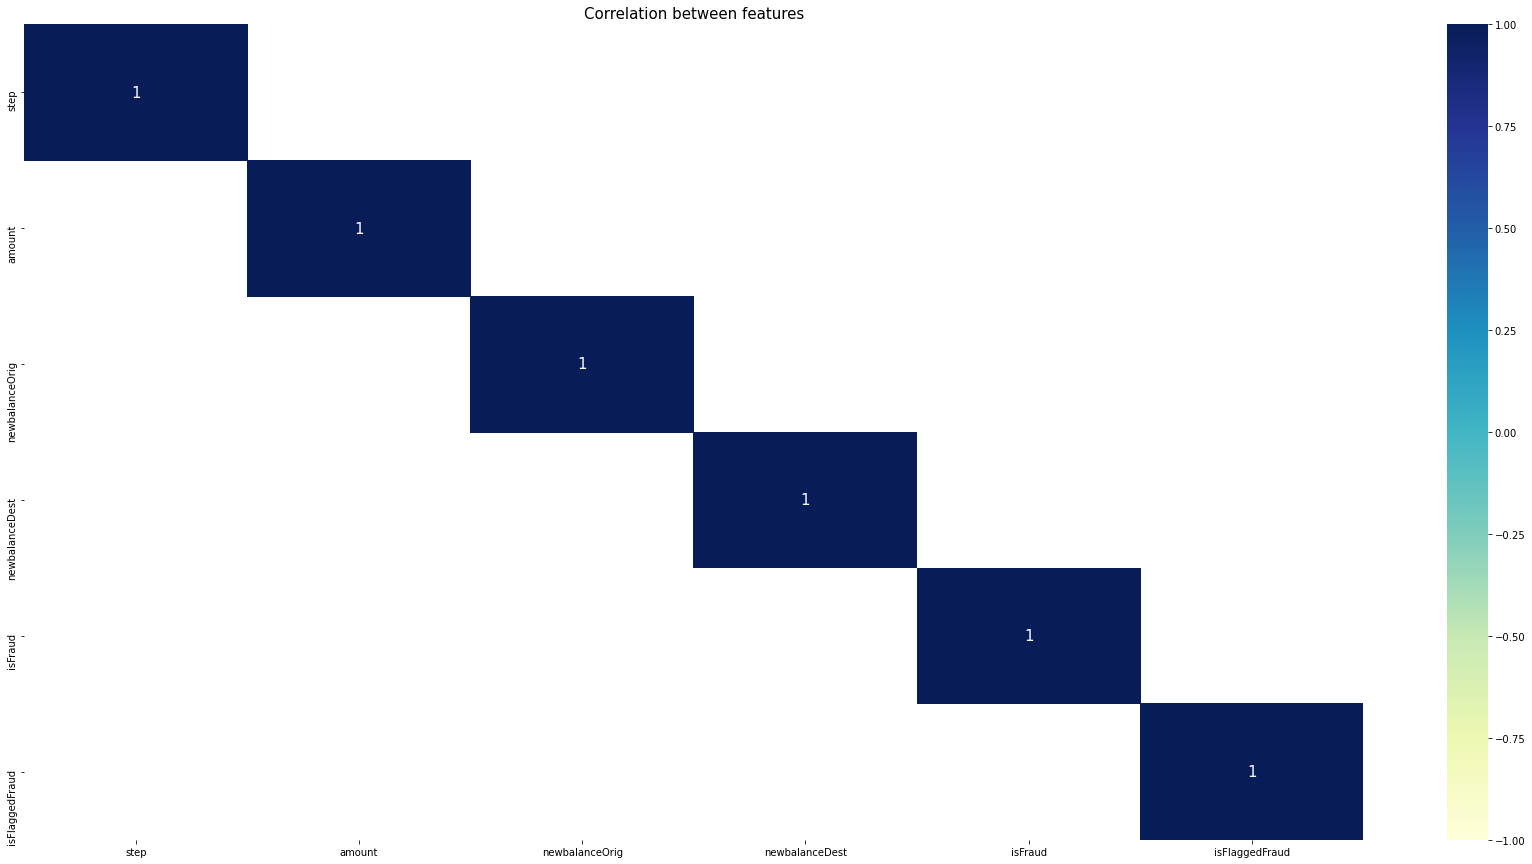

In [17]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], annot=True, annot_kws={'size': 15}, cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation between features', fontsize=15)
plt.show()

### Encoding variables

In [18]:
dummy_table = pd.get_dummies(credit_data1["type"], prefix="type")
dummy_table.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [19]:
dummy_cols = dummy_table.columns.values
credit_data1[dummy_cols] = dummy_table
credit_data1.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,0,0,0,1,0


In [20]:
credit_data1.drop(["type"], axis=1, inplace=True)
credit_data1.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,0.00,C553264065,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,0.00,C38997010,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,0,0,0,1,0


In [21]:
credit_data1.shape

(6362620, 13)

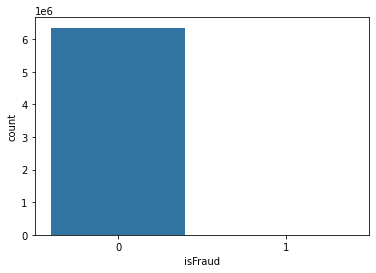

In [38]:
sns.countplot(credit_data1["isFraud"])
plt.show()

There is a huge difference in number of observations of both the classes which can result in bias model.

### Feature Selection

In [23]:
num_cols = credit_data1.var().index.values
num_cols

array(['step', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split

X = credit_data1[num_cols].drop(["isFraud"], axis=1)
y = credit_data1["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training shape:")
print(X_train.shape)
print(y_train.shape)
print()
print("Testing shape:")
print(X_test.shape)
print(y_test.shape)

Training shape:
(5090096, 10)
(5090096,)

Testing shape:
(1272524, 10)
(1272524,)


In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a random forest classifier
clf = RandomForestClassifier(random_state=0)

#Train the classifier
clf.fit(X_train, y_train)

feat_labels = X.columns.values

#Print name & gini importance of each feature
feature_importance = []
for feature in zip(feat_labels, clf.feature_importances_):
    feature_importance.append(feature)

feature_importance

[('step', 0.2858856151793176),
 ('amount', 0.16555798859220827),
 ('newbalanceOrig', 0.007559455744985807),
 ('newbalanceDest', 0.48116249385256554),
 ('isFlaggedFraud', 0.0009073485611869537),
 ('type_CASH_IN', 0.006591241436585743),
 ('type_CASH_OUT', 0.011270551140122051),
 ('type_DEBIT', 0.0007531201830746083),
 ('type_PAYMENT', 0.0003948395998397452),
 ('type_TRANSFER', 0.03991734571011374)]

Selecting features with importance >= 0.01

In [28]:
selected_features = ["step", "amount", "newbalanceDest", "type_CASH_OUT", "type_TRANSFER"]

data_selected = credit_data1[selected_features]
data_selected.sample(10)

,step,amount,newbalanceDest,type_CASH_OUT,type_TRANSFER
5788405,401,46730.230000,0.00,0,0
5051072,354,228296.680000,939169.82,0,1
459579,19,226137.200000,2069198.47,1,0
4484598,324,112242.270000,289766.90,1,0
5221182,370,11879.130000,0.00,0,0
3961253,297,429156.830000,2053743.97,0,1
4816948,346,146041.290000,578725.32,1,0
3106346,235,179861.903549,1077716.73,0,1
5907106,404,291710.040000,0.00,0,0
3472918,258,155722.160000,1619784.13,1,0


### Standardise the Data

In [29]:
data_standardised = data_selected.copy(deep=True)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_standardised)

data_standardised[selected_features] = scaler.fit_transform(data_selected)
data_standardised.sample(10)

,step,amount,newbalanceDest,type_CASH_OUT,type_TRANSFER
3087174,0.315364,0.355223,0.000000,0.0,0.0
5725100,0.535040,0.162528,0.440683,1.0,0.0
454840,0.024259,0.000359,0.000000,0.0,0.0
1703897,0.214286,0.036951,0.000000,0.0,0.0
6276747,0.861186,0.680675,0.381439,0.0,0.0
253174,0.017520,0.016997,0.000000,0.0,0.0
2749069,0.284367,0.294661,0.323640,1.0,0.0
198497,0.016173,0.348004,0.047114,0.0,0.0
3830945,0.378706,0.154249,0.752736,1.0,0.0
3464891,0.345013,0.054515,0.980584,1.0,0.0


### Handling imbalanced data

In [42]:
X = data_standardised
y = credit_data1["isFraud"]

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#transform dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 6354407, 1: 6354407})


### Model Building

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

**Naive Bayes**

Naive bayes uses maximising posteriori method and Gaussian Naive bayes conditional probability to predict the class.

In [45]:
from sklearn.naive_bayes import GaussianNB

#build the model
gnb = GaussianNB()

#fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred_GNB = gnb.predict(X_test)

In [53]:
from sklearn import metrics

cols = ['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score']

result_tabulation = pd.DataFrame(columns=cols)

Naive_bayes = pd.Series({'Model': 'Naive Bayes',
                        'Precision Score': metrics.precision_score(y_test, y_pred_GNB),
                        'Recall Score': metrics.recall_score(y_test, y_pred_GNB),
                        'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),
                        'f1-score': metrics.f1_score(y_test, y_pred_GNB)})

result_tabulation = result_tabulation.append(Naive_bayes, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.851855,0.695139,0.787161,0.765559


**Logistic Regression**

Logistic Regression makes prediction using maximising likelihood method in other which class has more probability or likelihood tp occur.

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred_LogReg = logreg.predict(X_test)

In [54]:
Logistic_reg = pd.Series({'Model': 'Logistic Regression',
                        'Precision Score': metrics.precision_score(y_test, y_pred_LogReg),
                        'Recall Score': metrics.recall_score(y_test, y_pred_LogReg),
                        'Accuracy Score': metrics.accuracy_score(y_test, y_pred_LogReg),
                        'f1-score': metrics.f1_score(y_test, y_pred_LogReg)})

result_tabulation = result_tabulation.append(Logistic_reg, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.851855,0.695139,0.787161,0.765559
1,Logistic Regression,0.741951,0.855176,0.778913,0.794550


**KNN**

K-Nearest-Neighbors takes into consideration closest "k" number of neighboring observations using euclidian distance to predict the target variable.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [56]:
y_pred_KNN = knn.predict(X_test)

In [58]:
KNN = pd.Series({'Model': 'K-Nearest-Neighbors',
                        'Precision Score': metrics.precision_score(y_test, y_pred_KNN),
                        'Recall Score': metrics.recall_score(y_test, y_pred_KNN),
                        'Accuracy Score': metrics.accuracy_score(y_test, y_pred_KNN),
                        'f1-score': metrics.f1_score(y_test, y_pred_KNN)})

result_tabulation = result_tabulation.append(KNN, ignore_index=True)

result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Naive Bayes,0.851855,0.695139,0.787161,0.765559
1,Logistic Regression,0.741951,0.855176,0.778913,0.794550
2,K-Nearest-Neighbors,0.983387,0.998310,0.990724,0.990792


From, the above results we can see that KNN gives the highest performance measures as compared to Naive Bayes nad Logistic Regression.

The key factor in predicting can be the transaction amount, but we do have a mechanism where if the amount is more than a specific amount we get a confirmation call for proceeding with the transaction. But, there are other factors that should be taken into consideration in this digital world of apps and internet banking that is the device from which the transaction is made is it from some odd device, or an irregular destination account. Still if the fraudulent person is too smart we cannot recognise if the transaction amount is not beyond the specified threshold, or the destination account seems to be just a regular DMART account. 